Lambda School Data Science

*Unit 4, Sprint 2, Module 2*

---

# Backpropagation & Gradient Descent (Prepare)

## Learning Objectives
* <a href="#p1">Part 1</a>: Explain the intutition behind backproprogation
* <a href="#p2">Part 2</a>: Implement gradient descent + backpropagation on a feedforward neural network. 
* <a href="#p3">Part 3</a>: Introduce the Keras Sequential Model API

## Summary of Yesterday

Yesterday, we learned about some of the principal components of Neural Networks: Neurons, Weights, Activation Functions, and layers (input, output, & hidden). Today, we will reinforce our understanding of those components and introduce the mechanics of training a neural network. Feed-forward neural networks, such as multi-layer perceptrons (MLPs), are almost always trained using some variation of gradient descent where the gradient has been calculated by backpropagation.

<center><img src="https://cdn-images-1.medium.com/max/1600/1*_M4bZyuwaGby6KMiYVYXvg.jpeg" width="400"></center>

* WEIGHTS ARE PARAMERTERS

* HIDDEN LAYERS GET INFO FROM INPUT + HIDDEN NODES

* FEATURES (DATASET MAKE THE NUMBER OF NURONS IN STRUCTIRE - WE CAN NOT CHANGE THAT

* DENSE NN - MEANS EACH INPUT NODE IS CONNECTED TO EVERY NODE IN THE NEXT  LAYER (HIDDEN LAYER)

* SOME NN HAVE SKIP LAYERS THAT SKIP A LAYER

* TO HAVE MORE HIDDEN LAYERS VS HAVING LOST OF NUERONS IN A SMALLER NUMBER OF HIDDEN LAYERS

* BIAS -> LIKE HUMAN BRAIN , INPUTS EXESEED LEVEL THEN NURON WILL FIRE , EACH NODE HAS A LEVEL/"CAP" of when IT NEEDS TO FIRE TO NEXT LAYER

  * BIAS NEGATIVE = SIGMOID MOVES TO THE RIGHT
  * BIAS POSTIVE = SIGMOID MOVE TO THE LEFT
-------------------------------------------------------------------------------
- There are three kinds of layers: input, hidden, and output layers.
- Each layer is made up of **n** individual neurons (aka activation units) which have a corresponding weight and bias.
- Signal is passed from layer to layer through a network by:
 - Taking in inputs from the training data (or previous layer)
 - Multiplying each input by its corresponding weight (think arrow/connecting line)
 - Adding a bias to this weighted some of inputs and weights
 - Activating this weighted sum + bias by squishifying it with sigmoid or some other activation function. With a single perceptron with three inputs, calculating the output from the node is done like so:
\begin{align}
 y = sigmoid(\sum(weight_{1}input_{1} + weight_{2}input_{2} + weight_{3}input_{3}) + bias)
\end{align}
 - this final activated value is the signal that gets passed onto the next layer of the network.
 

## Training a Neural Network: *Formal Summary*

------------- 2. IS INOPUT LAYER TO NEXT LAYER - HIDDEN--------------
------- 4. GRADENT FOR ALL WEIGHTS
-----------




0. Pick a network architecture
   - No. of input units = No. of features
   - No. of output units = Number of Classes (or expected targets)
   - Select the number of hidden layers and number of neurons within each hidden layer
1. Randomly initialize weights
2. Implement forward propagation to get $h_{\theta}(x^{(i)})$ for any $x^{(i)}$
3. Implement code to compute a cost function $J(\theta)$
4. Implement backpropagation to compute partial derivatives- IN OTHER WORDS COMPUTE THE GRADIENCE $\frac{\delta}{\delta\theta_{jk}^{l}}{J(\theta)}$
5. Use gradient descent (or other advanced optimizer) with backpropagation to minimize - IN OTHER WORDS OPTIMIZE THE GRADIENCE IN REALTION TO THE WEIGHTS $J(\theta)$ as a function of parameters $\theta\$
6. Repeat steps 2 - 5 until cost function is 'minimized' or some other stopping criteria is met. One pass over steps 2 - 5 is called an iteration or epoch.

## Calculating *"cost"*, *"loss"* or *"error"*


* 4 INPUT NODES = 4 COLUMNS IN DF [N, 4] = FEATURE MATRIX
* NN NOTATION
  * X ZERO IS AROUND - CONNECTED TO NEXT LAYERS
  * SUBSCRIP 1 = FEATURE NUMBER
  * SUBSCRIPT 2 = NERURON NUMBER
  * SUPER SCRIPT = LAYER NUMBER
* HEAVEST WEIGHT DEPENDS ON NUREONS - 1ST HIDDEN LAYER HAS 4 INPUTS SO FOR WEIGHTS FOR EACH NODE IN THE 1ST HIDDEN LAYER -- weights can  BE IN MATRICIES

* X MATIRIC [N, 4] MATRIC MULUPLY BY WEIGHT IN HIDDEN LATER 1 [4,5] WHICH GIVES [N, 5]
  * THEN THE NEW MATIRX GETS MULTIPLED IN THE NEXT LAYER [N, 7] 
  * ACTIVATION FUNCTIONS HAPPEN INBETWEEN THE MULTIPLIING ---GET TO  [N, 7]
  * FINALLY AT THE END WE GET Y HAT IS AN ARRAY OF PREDICTIONS

* LOSS FUNCTION IS PARAMTERS IN ALL LAYERS
  * EXPRESSED AS DIFFENECE - NOT SUBTRACTIONN - PREDICTION AND ACTUAL N^2
  * MEARURE OF HOW BAD THE PREDICTIONS ARE
  * TRYS TO MINIMISE LOCAL MINIUMS
  * loss funmction is averaged over all neurons - only get 1 value
  * loss function used to see how bad things are
  * 1 number measure how bad or good the NN is ACOROSS THE ENTIRE DATA SET

-------------------------------------------------------------------------------
We've talked about how in order to evaluate a network's performance, the data is "fed forward" until predictions are obtained and then the "loss" or "error" for a given observation is ascertained by looking at what the network predicted for that observation and comparing it to what it *should* have predicted. 

The error for a given observation is calculated by taking the square of the difference between the predicted value and the actual value. 

We can summarize the overall quality of a network's predictions by finding the average error across all observations. This gives us the "Mean Squared Error." which hopefully is a fairly familiar model evaluation metric by now. Graphing the MSE over each epoch (training cycle) is a common practice with Neural Networks. This is what you're seeing in the top right corner of the Tensorflow Playground website as the number of "epochs" climbs higher and higher.

## What is an "Epoch"?


---------- TAKES 1 STEP IN GRADIENT DESENT ----
------- EVERYTIME YOU PASS DATA THROUGH THE GRADIENT DECENT IS AN EPOCH

An "Epoch" is one cycle of passing our data forward through the network, measuring error given our specified cost function, and then -via gradient descent- updating weights within our network to hopefully improve the quality of our predictions on the next iteration.

### A note about Hyperparameters

Neural Networks have many more hyperparameters than other machine learning algorithms which is part of what makes them a beast to train.

1. You need more data to train them on. 
2. They're complex so they take longer to train. 
3. They have lots and lots of hyperparameters which we need to find the most optimal combination of, so we might end up training our model dozens or hundreds of times with different combinations of hyperparameters in order to try and squeeze out a few more tenths of a percent of accuracy. 

# Backpropagation (Learn)
<a id="p1"></a>

## Overview

Backpropagation is short for ["Backwards Propagation of errors"](https://en.wikipedia.org/wiki/Backpropagation) and refers to a specific (rather calculus intensive) algorithm for how weights in a neural network are updated in reverse order at the end of each training epoch. Our purpose today is to demonstrate the backpropagation algorithm on a simple Feedforward Neural Network and in so doing help you get a grasp on the main process. If you want to understand all of the underlying calculus of how the gradients are calculated then you'll need to dive into it yourself, [3Blue1Brown's video is a great starting place](https://www.youtube.com/watch?v=tIeHLnjs5U8). I also highly recommend this Welch Labs series [Neural Networks Demystified](https://www.youtube.com/watch?v=bxe2T-V8XRs) if you want a rapid yet orderly walk through of the main intuitions and math behind the backpropagation algorithm. 

### What is a Gradient?

* GRANDENT DECENT IS LIKE BEING IN A VELLEY IN HEAVY FOG
  * TRYING TO FIND YOUR FREIND WHO IS AT THE LOWEST POINT IN THE VALLEY
  * EACH STEP IS DONE EACH TIME YOU RUN THE NN. 

-------------------------------------------------------------------------------
> In vector calculus, the gradient is a multi-variable generalization of the derivative. 

The gradients that we will deal with today will be vector representations of the derivative of the activation function. 

## Follow Along

In this section, we will again implement a multi-layer perceptron using numpy. We'll focus on using a __Feed Forward Neural Network__ to predict test scores. 

![231 Neural Network](https://cdn-images-1.medium.com/max/1600/1*IjY3wFF24sK9UhiOlf36Bw.png)

### Generate some Fake Data

In [ ]:
import numpy as np

np.random.seed(812)

# Imagine that our data is drawn from a linear function
# y = 2*hours_studying + 4*hours_sleeping + 50

# hours studying, hours sleep
X = np.array(([2,9],
              [1,5],
              [3,6]), dtype=float)

# Exam Scores
y = np.array(([90],
              [72],
              [80]), dtype=float)

### Feature Normalization

In [ ]:
# Normalizing Data on feature 
# Neural Network would probably do this on its own, but it will help us converge on a solution faster
X = X / np.amax(X, axis=0) 
y = y / 100 # devide by the maxium

print("Studying, Sleeping \n", X)
print("Test Score \n", y)

Studying, Sleeping 
 [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Test Score 
 [[0.9 ]
 [0.72]
 [0.8 ]]


### Neural Network Architecture
Lets create a Neural_Network class to contain this functionality

In [ ]:
class NeuralNetwork:
    
    def __init__(self):
        # Set up Arch
        self.inputs = 2
        self.hiddenNodes = 3
        self.outputNodes = 1
        
        # Initialize Weights
        # 2x3
        self.weights1 = np.random.randn(self.inputs,self.hiddenNodes)
        
        # 3x1
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)

### Randomly Initialize Weights
How many random weights do we need to initialize? "Fully-connected Layers"

In [ ]:
nn = NeuralNetwork()

In [ ]:
print("Layer 1 weights: \n", nn.weights1)
print("Layer 2 weights: \n", nn.weights2)

Layer 1 weights: 
 [[ 2.48783189  0.11697987 -1.97118428]
 [-0.48325593 -1.50361209  0.57515126]]
Layer 2 weights: 
 [[-0.20672583]
 [ 0.41271104]
 [-0.57757999]]


### Implement Feedforward Functionality

After this step our neural network should be able to generate an output even though it has not been trained.

In [ ]:
class NeuralNetwork:
    
    def __init__(self):
        # Set up Arch
        self.inputs = 2
        self.hiddenNodes = 3
        self.outputNodes = 1
        
        # Initialize Weights
        # 2x3
        # Input to Hidden (1st set of weights)
        self.weights1 = np.random.randn(self.inputs,self.hiddenNodes)
        
        # 3x1
        # Hidden to Output (2nd set of weights)
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        """
        
        # Weighted Sum
        self.hidden_sum = np.dot(X, self.weights1) # matrix that are multplieD
        
        # Activate
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weighted sum of activated hidden (which output layer will use)
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final Activation of Output (My Predictions)
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output

In [ ]:
X

array([[0.66666667, 1.        ],
       [0.33333333, 0.55555556],
       [1.        , 0.66666667]])

### Make a Prediction

In [ ]:
# Try to make a prediction with our updated 'net
nn = NeuralNetwork()
print(X[0])
output = nn.feed_forward(X[0])
print("output", output)

[0.66666667 1.        ]
output [0.25814933]


### Calculate Error

In [ ]:
error = y[0] - output
error

array([0.64185067])

In [ ]:
output_all = nn.feed_forward(X)
error_all = y - output_all
print(output_all)
print(error_all)

[[0.25814933]
 [0.33067192]
 [0.22642076]]
[[0.64185067]
 [0.38932808]
 [0.57357924]]


Why is my error so big?

My error is so big because my prediction is low.

Why are my prediction low?

Because either:

  1) Second layer **weights** are low
  
  (or)
  
  2) Activations coming from the first layer are low
  
How are activations from the first layer determined? 

  1) By inputs - fixed
  
  2) by **weights** - variable
  
The only thing that I have control over throughout this process in order to increase the value of my final predictions is to either increase weights in layer 2 or increase weights in layer 1. 

Imagine that you could only change your weights by a fixed amount. Say you have .3 and you have to split that up and disperse it over your weights so as to increase your predictions as much as possible. (This isn't actually what happens, but it will help us identify which weights we would benefit the most from moving.)

I need to increase weights of my model somewhere, I'll get the biggest bang for my buck if I increase weights in places where I'm already seeing high activation values -because they end up getting multiplied together before being passed to the sigmoid function. 

> "Neurons that fire together, wire together"

### Implement Backpropagation 

> *Assigning blame for bad predictions and delivering justice - repeatedly and a little bit at a time*

What in our model could be causing our predictions to suck so bad? 

Well, we know that our inputs (X) and outputs (y) are correct, if they weren't then we would have bigger problems than understanding backpropagation.

We also know that our activation function (sigmoid) is working correctly. It can't be blamed because it just does whatever we tell it to and transforms the data in a known way.

So what are the potential culprits for these terrible predictions? The **weights** of our model. Here's the problem though. I have weights that exist in both layers of my model. How do I know if the weights in the first layer are to blame, or the second layer, or both? 

Lets investigate. And see if we can just eyeball what should be updated.

In [ ]:
attributes = ['weights1', 'hidden_sum', 'activated_hidden', 'weights2', 'activated_output']
[print(i+'\n', getattr(nn,i), '\n'+'---'*3) for i in attributes if i[:2]!= '__'] 

weights1
 [[-1.75351135  1.23279898  0.24464757]
 [-0.06568225  0.30190098  0.79723428]] 
---------
hidden_sum
 [[-1.23468981  1.12376697  0.96033266]
 [-0.62099392  0.57865576  0.52445712]
 [-1.79729952  1.4340663   0.77613709]] 
---------
activated_hidden
 [[0.22536165 0.75468678 0.7231884 ]
 [0.34955543 0.64075804 0.6281894 ]
 [0.14218011 0.8075341  0.68484697]] 
---------
weights2
 [[ 1.23073545]
 [-1.52187331]
 [-0.25502715]] 
---------
activated_output
 [[0.25814933]
 [0.33067192]
 [0.22642076]] 
---------


[None, None, None, None, None]

### Update Weights Based on Gradient

Repeat steps 2-4 for every observation in a given batch, and then given the network's cost function, calculate its gradient using calculus and update weights associated with the (negative) gradient of the cost function. 

Remember that we have 9 weights in our network therefore the gradient that comes from our gradient descent calculation will be the vector that takes us in the most downward direction along some function in 9-dimensional hyperspace. <br>
-------- these below are all the weights ------------
\begin{align}
C(w1, w2, w3, w4, w5, w6, w7, w8, w9)
\end{align}

You should also know that with neural networks it is common to have gradients that are not convex (like what we saw when we applied gradient descent to linear regression). Due to the high complexity of these models and their nonlinearity, it is common for gradient descent to get stuck in a local minimum, but there are ways to combat this:

1) Stochastic Gradient Descent

2) More advanced Gradient-Descent-based "Optimizers" - See Stretch Goals on assignment.

In [ ]:
# I want activations that correspond to negative weights to be lower
# and activations that correspond to positive weights to be higher

class NeuralNetwork:
    
    def __init__(self):
        # Set up Arch
        self.inputs = 2
        self.hiddenNodes = 3
        self.outputNodes = 1
        
        # Initialize Weights
        # 2x3
        # Input to Hidden (1st set of weights)
        self.weights1 = np.random.randn(self.inputs,self.hiddenNodes)
        
        # 3x1
        # Hidden to Output (2nd set of weights)
        self.weights2 = np.random.randn(self.hiddenNodes, self.outputNodes)
        
    def sigmoid(self, s):
        return 1 / (1+np.exp(-s))
    
    def sigmoidPrime(self, s):
        sx = self.sigmoid(s)
        return sx * (1-sx)
    
    def feed_forward(self, X):
        """
        Calculate the NN inference using feed forward.
        """
        
        # Weighted Sum
        self.hidden_sum = np.dot(X, self.weights1)
        
        # Activate
        self.activated_hidden = self.sigmoid(self.hidden_sum)
        
        # Weighted sum of activated hidden (which output layer will use)
        self.output_sum = np.dot(self.activated_hidden, self.weights2)
        
        # Final Activation of Output (My Predictions)
        self.activated_output = self.sigmoid(self.output_sum)
        
        return self.activated_output
    
    def backward(self, X, y, o):
        """
        Back prop thru the network - helps adjust weights layers prior
        """
        
        self.o_error = y - o # Error in the output
        
        # Apply derivative of sigmoid to error
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        
        # z2 error: how much were our output layer weights off
        self.z2_error = self.o_delta.dot(self.weights2.T)
        
        # z2 delta: how much were the weights off?
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.output_sum)

        self.weights1 += X.T.dot(self.z2_delta) #Adjust first set (input => hidden) weights
        self.weights2 += self.activated_hidden.T.dot(self.o_delta) #adjust second set (hidden => output) weights
        
    def train(self, X,y):
        o = self.feed_forward(X)
        self.backward(X,y,o)

#### Let's look at the shape of the Gradient Componets


In [ ]:
nn = NeuralNetwork()

nn.train(X,y)

##### Our Error Associated with Each Observation 
aka how wrong were we?

In [ ]:
nn.o_error

array([[0.60746115],
       [0.46613403],
       [0.53667427]])

##### 1st Gradient 
Simple interpretation - how much more sigmoid activation would have pushed us towards the right answer?

`self.o_delta = self.o_error * self.sigmoidPrime(self.output_sum)`

In [ ]:
nn.o_delta

array([[0.14866196],
       [0.11467591],
       [0.13186936]])

Let's take a look at the derivate of the sigmoid function to understand what's happening. 

In [ ]:
import matplotlib.pyplot as plt

line_x = np.arange(-5, 5, 0.01)

def sigmoid(x):
    return 1 / (1+ np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

# sigmoid
y = sigmoid(line_x)
y_d = sigmoid_derivative(line_x)

x = nn.output_sum
s = sigmoid(x)
sx = sigmoid_derivative(x)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


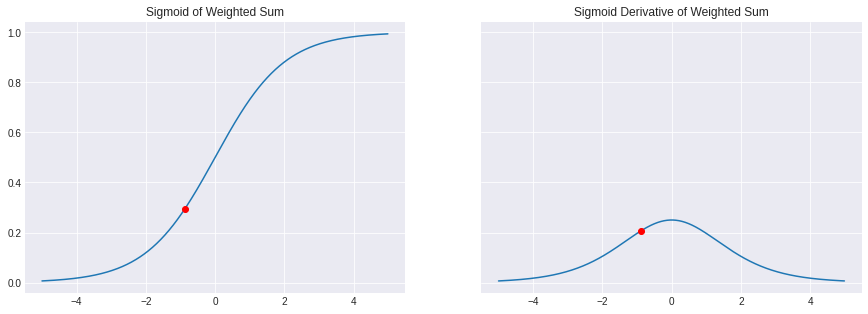

In [ ]:
# call regplot on each axes
import seaborn as sns
plt.style.use('seaborn-darkgrid')
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
sns.lineplot(x=line_x, y=y, ax=ax1)
ax1.plot(x[0], s[0], 'ro')
ax1.set_title("Sigmoid of Weighted Sum")
sns.lineplot(x=line_x, y=y_d, ax=ax2) 
ax2.plot(x[0],sx[0],'ro');
ax2.set_title("Sigmoid Derivative of Weighted Sum");

Look at the derivate graph. The derivative multiplied by the error tells us where to assign blame and update the weights most effective. 

##### 2nd Error
Justice hasn't been served yet - tho. We still have neurons to blame. Let's go back another layer. 

`self.z2_error = self.o_delta.dot(self.weights2.T)`

__Discussion:__ Why is this shape different?

In [ ]:
nn.o_delta.dot(nn.weights2.T)

array([[-0.23952061, -0.19347426,  0.1111231 ],
       [-0.1847631 , -0.14924354,  0.08571892],
       [-0.21246478, -0.17161974,  0.09857082]])

##### 2nd Gradient
For each observation, how much more sigmoid activation from this layer would have pushed us towards the right answer?

`self.z2_delta = self.z2_error * self.sigmoidPrime(self.activated_hidden)`

In [ ]:
nn.z2_delta

array([[-0.05483346, -0.04408088,  0.01744341],
       [-0.03871267, -0.0311213 ,  0.01231513],
       [-0.04559029, -0.03665025,  0.01450301]])

In [ ]:
X.T.shape == nn.weights1.shape

True

##### Descent

*Discussion:* Input to Hidden Weight Update
- We multiply the gradient by the inputs. Why?
- Why do we need to transpose the inputs? 

In [ ]:
X.T

array([[0.66666667, 0.33333333, 1.        ],
       [1.        , 0.55555556, 0.66666667]])

In [ ]:
X.T.dot(nn.z2_delta)

array([[-0.09505015, -0.07641127,  0.03023699],
       [-0.10673402, -0.08580399,  0.03395382]])

*Discussion:* Hidden to Output Weight Update
- Why is output the shape 3x1? 
- We multiply the gradient by the inputs. Why?
- Why do we need to transpose the inputs?

In [ ]:
nn.activated_hidden.T.dot(nn.o_delta)

array([[0.17103686],
       [0.13129211],
       [0.18053762]])

### Train the Network (fo real this time)

In [ ]:
# Train my 'net
nn = NeuralNetwork()

# Number of Epochs / Iterations
for i in range(5000):
    if (i+1 in [1,2,3,4,5]) or ((i+1) % 500 ==0):
        print('+' + '---' * 3 + f'EPOCH {i+1}' + '---'*3 + '+')
        print('Input: \n', X)
        print('Actual Output: \n', y)
        print('Predicted Output: \n', str(nn.feed_forward(X)))
        print("Loss: \n", str(np.mean(np.square(y - nn.feed_forward(X)))))
    nn.train(X,y)

+---------EPOCH 1---------+
Input: 
 [[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
 [0.00669285 0.00675966 0.00682713 0.00689527 0.00696409 0.00703359
 0.00710377 0.00717466 0.00724624 0.00731853 0.00739154 0.00746527
 0.00753973 0.00761493 0.00769088 0.00776757 0.00784502 0.00792324
 0.00800223 0.00808201 0.00816257 0.00824393 0.00832609 0.00840907
 0.00849286 0.00857749 0.00866294 0.00874925 0.0088364  0.00892442
 0.0090133  0.00910306 0.00919371 0.00928525 0.00937769 0.00947104
 0.00956532 0.00966052 0.00975667 0.00985376 0.0099518  0.01005081
 0.0101508  0.01025177 0.01035374 0.01045671 0.01056069 0.01066569
 0.01077173 0.01087881 0.01098694 0.01109614 0.01120641 0.01131776
 0.0114302  0.01154375 0.01165842 0.01177421 0.01189113 0.0120092
 0.01212843 0.01224883 0.01237041 0.01249319 0.01261716 0.01274235
 0.01286876 0.01299642 0.01312532 0.01325548 0.01338692 0.01351964
 0.01365366 0.01378899 0.01392564 0.01406363 0.01420296 0.01434366


ValueError: ignored

## Challenge

In the module project, you will implement backpropagation inside a multi-layer perceptron (aka a feedforward neural network). 

# Stochastic Gradient Descent (Learn)

## Overview

The What - Stochastic Gradient Descent calculates an approximation of the gradient over the entire dataset by reviewing the predictions of a random sample. 

The Why - *Speed*. Calculating the gradient over the entire dataset is extremely expensive computationally. 

## Follow Along

A true Stochastic GD-based implementation from [Welch Labs](https://www.youtube.com/watch?v=bxe2T-V8XRs)

In [ ]:
model.evaluate(X,y)
model.predict(X)

In [ ]:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    #Helper Functions for interacting with other classes:
    def getParams(self):
        #Get W1 and W2 unrolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single paramater vector.
        W1_start = 0
        W1_end = self.hiddenLayerSize * self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [ ]:
from scipy import optimize
class trainer(object):
    def __init__(self, N):
        #Make Local reference to network:
        self.N = N
        
    def callbackF(self, params):
        self.N.setParams(params)
        self.J.append(self.N.costFunction(self.X, self.y))   
        
    def costFunctionWrapper(self, params, X, y):
        self.N.setParams(params)
        cost = self.N.costFunction(X, y)
        grad = self.N.computeGradients(X,y)
        
        return cost, grad
        
    def train(self, X, y):
        #Make an internal variable for the callback function:
        self.X = X
        self.y = y

        #Make empty list to store costs:
        self.J = []
        
        params0 = self.N.getParams()

        options = {'maxiter': 200, 'disp' : True}
        _res = optimize.minimize(self.costFunctionWrapper, params0, jac=True, method='BFGS', display=  \
                                 args=(X, y), options=options, callback=self.callbackF)

        self.N.setParams(_res.x)
        self.optimizationResults = _res

In [ ]:
NN = Neural_Network()

In [ ]:
T = trainer(NN)

In [ ]:
T.train(X,y)

In [ ]:
print("Predicted Output: \n" + str(NN.forward(X))) 
print("Loss: \n" + str(np.mean(np.square(y - NN.forward(X))))) # mean sum squared loss

In [ ]:
import matplotlib.pyplot as plt
plt.plot(T.J)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()     

## Challenge

This is a reference implementation for you to explore. You will not be expected to apply it to today's module project. 

# Keras Sequential API (Learn)

## Overview

----most don't use numpy for NN IT'S VERY COSTLY - SO KERAS IS PIOPULAR ---


> "Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research. Use Keras if you need a deep learning library that:

> Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
Supports both convolutional networks and recurrent networks, as well as combinations of the two.
Runs seamlessly on CPU and GPU." 

### Keras Perceptron Sample

In [ ]:
import pandas as pd

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
X = df[['x1', 'x2']].values
y = df['y'].values

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# This is our perceptron from Monday's by-hand: 
model = Sequential()
model.add(Dense(1,input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,y, epochs=5)

In [ ]:
# evaluate the model
scores = model.evaluate(X, y)
print(f"{model.metrics_names[1]}: {scores[1]*100}")

## Follow Along

In the `Sequential` api model, you specify a model architecture by 'sequentially specifying layers. This type of specification works well for feed forward neural networks in which the data flows in one direction (forward propagation) and the error flows in the opposite direction (backwards propagation). The Keras `Sequential` API follows a standardarized worklow to estimate a 'net: 

1. Load Data
2. Define Model
3. Compile Model
4. Fit Model
5. Evaluate Model

You saw these steps in our Keras Perceptron Sample, but let's walk thru each step in detail.

### Load Data

In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Stretch - use dropout 
import numpy as np

In [ ]:
# Load the Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train[0].shape

In [ ]:
X_train.shape

In [ ]:
# X Variable Types
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') /255.

# Correct Encoding on Y
# What softmax expects = [0,0,0,0,0,1,0,0,0,0]
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Define Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

import numpy as np

np.random.seed(812)

I'll instantiate my model as a "sequential" model. This just means that I'm going to tell Keras what my model's architecture should be one layer at a time.

In [ ]:
# https://keras.io/getting-started/sequential-model-guide/
model = Sequential()

Adding a "Dense" layer to our model is how we add "vanilla" perceptron-based layers to our neural network. These are also called "fully-connected" or "densely-connected" layers. They're used as a layer type in lots of other Neural Net Architectures but they're not referred to as perceptrons or multi-layer perceptrons very often in those situations even though that's what they are.

 > ["Just your regular densely-connected NN layer."](https://keras.io/layers/core/)
 
 The first argument is how many neurons we want to have in that layer. To create a perceptron-esque model we will just set it to 10. Our architecture is just an input and output layer. We will tell it that there will be 784 inputs coming into this layer from our dataset and set it to use the sigmoid activation function.

In [ ]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10,activation="softmax")) #Relu is valid option. 

### Compile Model
Using binary_crossentropy as the loss function here is just telling keras that I'm doing binary classification so that it can use the appropriate loss function accordingly. If we were predicting non-binary categories we might assign something like `categorical_crossentropy`. We're also telling keras that we want it to report model accuracy as our main error metric for each epoch. We will also be able to see the overall accuracy once the model has finished training.

#### Adam Optimizer
Check out this links for more background on the Adam optimizer and Stohastic Gradient Descent
* [Adam Optimization Algorithm](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
* [Adam Optimizer - original paper](https://arxiv.org/abs/1412.6980)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit Model

Lets train it up! `model.fit()` has a `batch_size` parameter that we can use if we want to do mini-batch epochs, but since this tabular dataset is pretty small we're just going to delete that parameter. Keras' default `batch_size` is `None` so omiting it will tell Keras to do batch epochs.

In [ ]:
model.fit(X_train, y_train, epochs=10)

### Evaluate Model

In [ ]:
scores = model.evaluate(X_test,y_test)
print("\n")
print("Validation Data Metrics:")
print(f"{model.metrics_names[0]}: {scores[0]}")
print(f"{model.metrics_names[1]}: {scores[1]*100}")

### Unstable Results

You'll notice that if we rerun the results might differ from the origin run. This can be explain by a bunch of factors. Check out some of them in this article: 

<https://machinelearningmastery.com/randomness-in-machine-learning/>

## Challenge

You will be expected to leverage the Keras `Sequential` api to estimate a feed forward neural networks on a dataset.

---

# JON CODY DS15 LECTURE

Goals
* Introduce the TensorFlow Keras API
* Show an example of training model
* Discuss Gradient Descent during the process
* Optional: Investigate the TensorFlow / Keras Code for Dense Layers

1. Import libraries / Tensorflow
2. Define a model 
3. Compile the model
4. Fit the model
5. Evaluate the model

In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD

In [2]:
# predicting for 10 categories
# DESIGNING THE CAR

# model is a sequence of dense layers
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784), # number of neurons, activation, inputs- our 1st hidden layer
                    Dense(5, activation='sigmoid'), # 2nd hidden layer
                    Dense(10, activation='softmax')]) # output layer- softmax is for classification - multiclass version of sigmoid

In [3]:
# complie the model
# SELECT THE MECHANIC AND HOW UPDATES WILL HAPPEN
# HOW THE MODEL WILL BE TRAINED

model.compile(optimizer= SGD(), loss= 'sparse_categorical_crossentropy', metrics= ['accuracy']) # sparce_C_C = does 1 hot encoding

In [4]:
# check out the model
# bias will add 5 parameters - SINCE 5 INPUTS
# 1ST HIDDEN LAYER --> 5 INPUTS AND 784 VALUES --> (5*784) = 3920 + (5 BIAS PARAMS)
# 2ND HIDDEN LAYER --> 5(1ST) * 5(2ND) + 5(BIAS) = 30 PARAMS
# 3RD HIDDEN LAYER --> 5(2ND * 10(OUTPUT) + 5 (BIAS) = 60 PARAMS

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 3925      
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                60        
Total params: 4,015
Trainable params: 4,015
Non-trainable params: 0
_________________________________________________________________


In [5]:
# get dataset

from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
# look at data - numpy arrays actually

print(X_train.shape) # not tablular 60000 images that are 28x28
X_train

(60000, 28, 28)


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

4


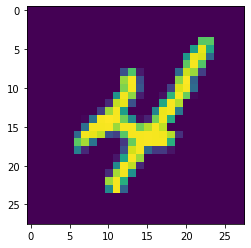

In [7]:
# get a visual of first index

import matplotlib.pyplot as plt

plt.imshow(X_train[9]);
print(y_train[9])

In [8]:
# reshaping data

X_train = X_train.reshape((60000, 784)) # 28*28= 784
print('X train:', X_train.shape)

X_test = X_test.reshape((10000, 784))
print('X test:', X_test.shape)

X train: (60000, 784)
X test: (10000, 784)


In [9]:
# look at our target

print(y_train.shape)
y_train[:10]

(60000,)


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
# fit the model

model.fit(X_train, y_train, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 2s 1ms/step - loss: 2.2069 - accuracy: 0.3170
Epoch 2/25
1875/1875 [==============================] - 2s 1ms/step - loss: 2.0311 - accuracy: 0.4649
Epoch 3/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8272 - accuracy: 0.5461
Epoch 4/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6400 - accuracy: 0.5629
Epoch 5/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4921 - accuracy: 0.5762
Epoch 6/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3792 - accuracy: 0.5733
Epoch 7/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.3004 - accuracy: 0.5713
Epoch 8/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.2310 - accuracy: 0.6036
Epoch 9/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.1993 - accuracy: 0.6031
Epoch 10/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.145

## Stochastic Gradient Descent
* Batches
* Learning Rate
* Evaluation

#### Batch Size
- Number of observations the model is shown to make predictions and update the weights.
- Selected randomly during each epoch.
- All observations are considered when passing thru an epoch at some point.

**Smaller Batch Size = Slower run time ( maybe have better results)** <br>
**Default Batch Size = Balance between speed and accuracy** <br>
**Large Batch Size = Very fast, but not as accurate**

In [11]:
# set the learning rate

sgd_01 = SGD(learning_rate= 0.01)

#### Default Experiment

_What changed from model above?_
* Optimizer and Learning Rate

In [12]:
# predicting for 10 categories
# DESIGNING THE CAR

# model is a sequence of dense layers
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784), # number of neurons, activation, inputs- our 1st hidden layer
                    Dense(5, activation='sigmoid'), # 2nd hidden layer
                    Dense(10, activation='softmax') # output layer- softmax is for classification - multiclass version of sigmoid
])


In [13]:
# compile the model- default
# SELECT THE MECHANIC AND HOW UPDATES WILL HAPPEN

model.compile(optimizer= sgd_01, loss= 'sparse_categorical_crossentropy', metrics= ['accuracy']) # sparce_C_C = does 1 hot encoding

In [14]:
# fit the model

batch_default = model.fit(X_train, y_train,
                         epochs= 25,
                         batch_size= 32, # default batch size
                         validation_data= (X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1766 - accuracy: 0.2465 - val_loss: 2.0765 - val_accuracy: 0.3160
Epoch 2/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9909 - accuracy: 0.2763 - val_loss: 1.8961 - val_accuracy: 0.2916
Epoch 3/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8360 - accuracy: 0.3274 - val_loss: 1.7749 - val_accuracy: 0.4071
Epoch 4/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7345 - accuracy: 0.4076 - val_loss: 1.6754 - val_accuracy: 0.4430
Epoch 5/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6552 - accuracy: 0.4554 - val_loss: 1.6407 - val_accuracy: 0.4478
Epoch 6/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5777 - accuracy: 0.4747 - val_loss: 1.5388 - val_accuracy: 0.4902
Epoch 7/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5345 - accuracy: 0.4647 - val_loss: 1.5495 - val_accuracy:

#### Small Batch Size Experiment

_What changed from model above?_
* Batch size is 1

In [15]:
# predicting for 10 categories
# DESIGNING THE CAR

# model is a sequence of dense layers
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784), # number of neurons, activation, inputs- our 1st hidden layer
                    Dense(5, activation='sigmoid'), # 2nd hidden layer
                    Dense(10, activation='softmax') # output layer- softmax is for classification - multiclass version of sigmoid
])

In [16]:
# compile the model- default
# SELECT THE MECHANIC AND HOW UPDATES WILL HAPPEN
# NEED TO RECOMPILE TO RERUN MODEL - RESETS THE STATE

model.compile(optimizer= sgd_01, loss= 'sparse_categorical_crossentropy', metrics= ['accuracy']) # sparce_C_C = does 1 hot encoding

In [17]:
# fit the model- small batch
# can change runtime = GPU -if GPU is good 

batch_small = model.fit(X_train, y_train,
                         epochs= 25,
                         batch_size= 1, # changed
                         validation_data= (X_test, y_test))

Epoch 1/25
60000/60000 [==============================] - 65s 1ms/step - loss: 2.2711 - accuracy: 0.1366 - val_loss: 2.3059 - val_accuracy: 0.1135
Epoch 2/25
60000/60000 [==============================] - 66s 1ms/step - loss: 2.1877 - accuracy: 0.1610 - val_loss: 2.0678 - val_accuracy: 0.2075
Epoch 3/25
60000/60000 [==============================] - 66s 1ms/step - loss: 2.0017 - accuracy: 0.2353 - val_loss: 1.9317 - val_accuracy: 0.2812
Epoch 4/25
60000/60000 [==============================] - 66s 1ms/step - loss: 1.9592 - accuracy: 0.2484 - val_loss: 2.1481 - val_accuracy: 0.1771
Epoch 5/25
60000/60000 [==============================] - 65s 1ms/step - loss: 2.0102 - accuracy: 0.2223 - val_loss: 2.0601 - val_accuracy: 0.2095
Epoch 6/25
60000/60000 [==============================] - 66s 1ms/step - loss: 2.0666 - accuracy: 0.1979 - val_loss: 2.0437 - val_accuracy: 0.2113
Epoch 7/25
60000/60000 [==============================] - 66s 1ms/step - loss: 2.0512 - accuracy: 0.1950 - val_loss: 2

#### Large Batch Size Experiment

_What changed from model above?_
* Batch size is 512

In [18]:
# predicting for 10 categories
# DESIGNING THE CAR

# model is a sequence of dense layers
model = Sequential([
                    Dense(5, activation='sigmoid', input_dim=784), # number of neurons, activation, inputs- our 1st hidden layer
                    Dense(5, activation='sigmoid'), # 2nd hidden layer
                    Dense(10, activation='softmax') # output layer- softmax is for classification - multiclass version of sigmoid
])

In [19]:
# compile the model- default
# SELECT THE MECHANIC AND HOW UPDATES WILL HAPPEN
# NEED TO RECOMPILE TO RERUN MODEL - RESETS THE STATE

model.compile(optimizer= sgd_01, loss= 'sparse_categorical_crossentropy', metrics= ['accuracy']) # sparce_C_C = does 1 hot encoding

In [20]:
# fit the model- large batch


batch_large = model.fit(X_train, y_train,
                         epochs= 25,
                         batch_size= 512, # changed
                         validation_data= (X_test, y_test))

Epoch 1/25
118/118 [==============================] - 1s 5ms/step - loss: 2.3507 - accuracy: 0.1654 - val_loss: 2.3193 - val_accuracy: 0.1999
Epoch 2/25
118/118 [==============================] - 0s 4ms/step - loss: 2.2979 - accuracy: 0.2042 - val_loss: 2.2795 - val_accuracy: 0.2073
Epoch 3/25
118/118 [==============================] - 0s 4ms/step - loss: 2.2667 - accuracy: 0.2086 - val_loss: 2.2537 - val_accuracy: 0.2097
Epoch 4/25
118/118 [==============================] - 0s 4ms/step - loss: 2.2441 - accuracy: 0.2107 - val_loss: 2.2349 - val_accuracy: 0.2107
Epoch 5/25
118/118 [==============================] - 0s 4ms/step - loss: 2.2267 - accuracy: 0.2113 - val_loss: 2.2191 - val_accuracy: 0.2110
Epoch 6/25
118/118 [==============================] - 1s 4ms/step - loss: 2.2120 - accuracy: 0.2115 - val_loss: 2.2052 - val_accuracy: 0.2106
Epoch 7/25
118/118 [==============================] - 0s 4ms/step - loss: 2.1988 - accuracy: 0.2112 - val_loss: 2.1925 - val_accuracy: 0.2108
Epoch 

#### Visualization of Results

In [21]:
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [22]:
# # not working - ?

# results = pd.DataFrame()

# for i, m in enumerate([batch_default, batch_small, batch_large]):

#   temp = pd.DataFrame.from_dict(m.history)
#   temp['epoch'] = temp.index.values
#   temp['model'] = i

#   results.append(temp, ignore_index = True)

In [24]:
# try this instead
# gather all data from all dataframes

# default batch
default = pd.DataFrame.from_dict(batch_default.history)
default['epoch'] = default.index.values
default['batch_size'] = 'Default: 32'

# small batch
small = pd.DataFrame.from_dict(batch_small.history)
small['epoch'] = small.index.values
small['batch_size'] = 'Small: 1'

# large batch
large = pd.DataFrame.from_dict(batch_large.history)
large['epoch'] = large.index.values
large['batch_size'] = 'Large: 512'

df = pd.concat([default, small, large])

In [25]:
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,batch_size
0,2.176607,0.246500,2.076453,0.3160,0,Default: 32
1,1.990925,0.276350,1.896067,0.2916,1,Default: 32
2,1.835994,0.327383,1.774942,0.4071,2,Default: 32
3,1.734482,0.407583,1.675401,0.4430,3,Default: 32
4,1.655234,0.455400,1.640651,0.4478,4,Default: 32


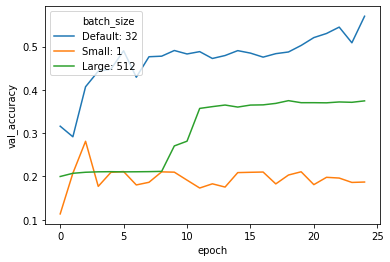

In [26]:
sns.lineplot(x='epoch', y='val_accuracy', hue='batch_size', data= df);

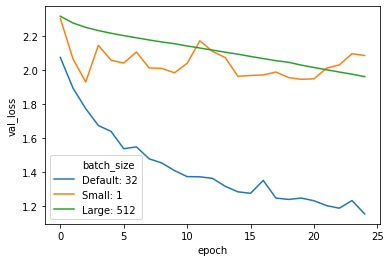

In [27]:
sns.lineplot(x='epoch', y='val_loss', hue='batch_size', data= df);

## Learning Rate

Learning rate controls the size of the update to our weights that the optimizer algorthim matke. THIS IS VERY IMPORTANT HYPERPERAMERTER.

* Too high of a learning rate causes unstable results
* Too low of a learning rate - model will never 'converge'
* Goldy Locks parameters - it needsbe 'just right'
* Scale of 0 - 1 

Repeat the same experiment from batch size but change the learning rates.
* Default rate = 0.01
* Low rate = 0.0001
* High rate = 0.75

## Default Learning Rate

In [29]:
sgd = SGD(learning_rate= 0.01)

# predict
model = Sequential([
                    Dense(5,activation= 'sigmoid', input_dim= 784),
                    Dense(5,activation= 'sigmoid'),
                    Dense(10,activation= 'softmax')
                    ])
# compile
model.compile(optimizer= sgd, loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])



# fit the model- default Learning rate
lr_default = model.fit(X_train, y_train,
                         epochs= 25,
                         batch_size= 32, # changed
                         validation_data= (X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1572 - accuracy: 0.2147 - val_loss: 2.0349 - val_accuracy: 0.2701
Epoch 2/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.9479 - accuracy: 0.3325 - val_loss: 1.8567 - val_accuracy: 0.4427
Epoch 3/25
1875/1875 [==============================] - 3s 1ms/step - loss: 1.7978 - accuracy: 0.4575 - val_loss: 1.7216 - val_accuracy: 0.4766
Epoch 4/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6744 - accuracy: 0.5387 - val_loss: 1.5998 - val_accuracy: 0.5565
Epoch 5/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5750 - accuracy: 0.5552 - val_loss: 1.5040 - val_accuracy: 0.5835
Epoch 6/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4913 - accuracy: 0.5538 - val_loss: 1.4109 - val_accuracy: 0.5887
Epoch 7/25
1875/1875 [==============================] - 2s 1ms/step - loss: 1.4065 - accuracy: 0.5612 - val_loss: 1.3566 - val_accuracy:

## Low Learning Rate

In [30]:
sgd = SGD(learning_rate= 0.0001)

# predict
model = Sequential([
                    Dense(5,activation= 'sigmoid', input_dim= 784),
                    Dense(5,activation= 'sigmoid'),
                    Dense(10,activation= 'softmax')
                    ])
# compile
model.compile(optimizer= sgd, loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])



# fit the model- low Learning rate
lr_low = model.fit(X_train, y_train,
                         epochs= 25,
                         batch_size= 32, # changed
                         validation_data= (X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3735 - accuracy: 0.0904 - val_loss: 2.3665 - val_accuracy: 0.0892
Epoch 2/25
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3594 - accuracy: 0.0904 - val_loss: 2.3532 - val_accuracy: 0.0892
Epoch 3/25
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3483 - accuracy: 0.0904 - val_loss: 2.3431 - val_accuracy: 0.0892
Epoch 4/25
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3397 - accuracy: 0.0904 - val_loss: 2.3359 - val_accuracy: 0.0892
Epoch 5/25
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3329 - accuracy: 0.0904 - val_loss: 2.3298 - val_accuracy: 0.0892
Epoch 6/25
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3272 - accuracy: 0.0904 - val_loss: 2.3249 - val_accuracy: 0.0892
Epoch 7/25
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3226 - accuracy: 0.0904 - val_loss: 2.3206 - val_accuracy:

## High Learning Rate

In [31]:
sgd = SGD(learning_rate= 0.75)

# predict
model = Sequential([
                    Dense(5,activation= 'sigmoid', input_dim= 784),
                    Dense(5,activation= 'sigmoid'),
                    Dense(10,activation= 'softmax')
                    ])
# compile
model.compile(optimizer= sgd, loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])



# fit the model- high Learning rate
lr_high = model.fit(X_train, y_train,
                         epochs= 25,
                         batch_size= 32, # changed
                         validation_data= (X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3088 - accuracy: 0.1041 - val_loss: 2.3050 - val_accuracy: 0.1009
Epoch 2/25
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3065 - accuracy: 0.1043 - val_loss: 2.3132 - val_accuracy: 0.0958
Epoch 3/25
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3068 - accuracy: 0.1033 - val_loss: 2.3043 - val_accuracy: 0.0958
Epoch 4/25
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3067 - accuracy: 0.1052 - val_loss: 2.3071 - val_accuracy: 0.0980
Epoch 5/25
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3064 - accuracy: 0.1039 - val_loss: 2.3063 - val_accuracy: 0.1010
Epoch 6/25
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3065 - accuracy: 0.1050 - val_loss: 2.3077 - val_accuracy: 0.1028
Epoch 7/25
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3066 - accuracy: 0.1051 - val_loss: 2.3048 - val_accuracy:

## Visualization of Results

In [32]:
# gather all data from all dataframes

# default learning rate
default = pd.DataFrame.from_dict(lr_default.history)
default['epoch'] = default.index.values
default['learning_rate'] = 'Default: 0.01'

# low learning rate
low = pd.DataFrame.from_dict(lr_low.history)
low['epoch'] = small.index.values
low['learning_rate'] = 'Low: 0.0001'

# high learning rate
high = pd.DataFrame.from_dict(lr_high.history)
high['epoch'] = high.index.values
high['learning_rate'] = 'High: 0.75'

df = pd.concat([default, low, high])

In [33]:
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,learning_rate
0,2.157223,0.214700,2.034883,0.2701,0,Default: 0.01
1,1.947854,0.332533,1.856748,0.4427,1,Default: 0.01
2,1.797774,0.457450,1.721597,0.4766,2,Default: 0.01
3,1.674366,0.538667,1.599788,0.5565,3,Default: 0.01
4,1.575019,0.555250,1.503993,0.5835,4,Default: 0.01


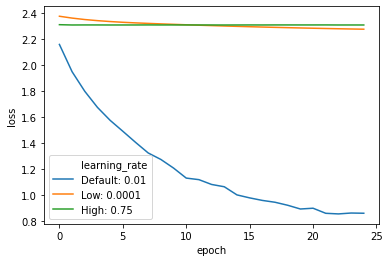

In [34]:
sns.lineplot(x='epoch', y='loss', hue='learning_rate', data= df);

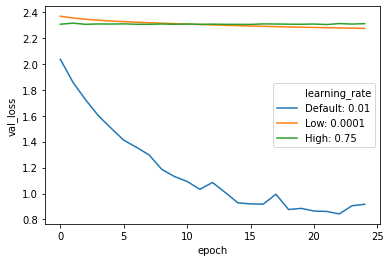

In [36]:
sns.lineplot(x='epoch', y='val_loss', hue='learning_rate', data= df);